In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv(r"C:\Users\chait\Downloads\height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

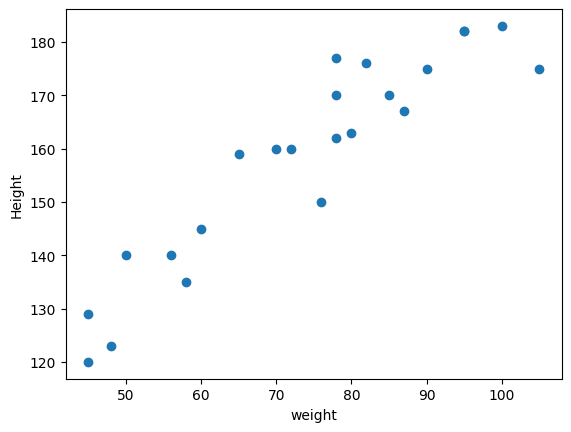

In [13]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel('Height')

In [14]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


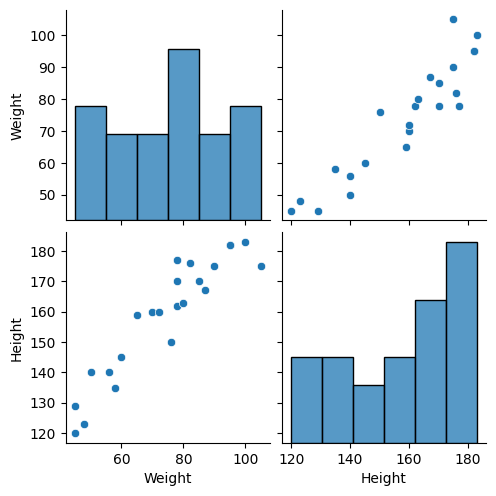

In [16]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [36]:
## step 1: divide into independent and dependent features
X=df[['Weight']] ###  independent feature should be data frame or 2 dimensional 
np.array(X).shape
Y=df['Height'] ## it can be 1D

In [30]:
X=df['Weight']
np.array(X).shape ## we get 1D array always make sure that indepndent feature in 2D

(23,)

In [38]:
## train test split
from sklearn.model_selection import train_test_split


In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [58]:
## standardization
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [61]:
x_test=scaler.transform(x_test)

In [62]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [63]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression

In [64]:
regression=LinearRegression()

In [66]:
regression.fit(x_train,y_train)

LinearRegression()

In [71]:
print("Coefficient or slop",regression.coef_)
print("intercept",regression.intercept_)

Coefficient or slop [17.2982057]
intercept 156.47058823529412


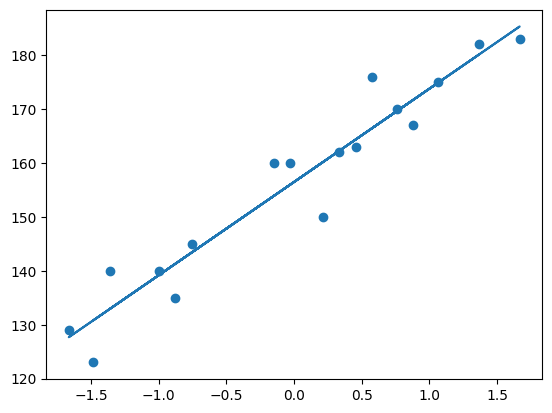

In [74]:
## plot training data ,plot bbest fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [75]:
## prediciton for test data
y_pred=regression.predict(x_test)

In [76]:
## performace metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [77]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [78]:
# for r_square
from sklearn.metrics import r2_score


In [79]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [82]:
# for adjjusted r_square
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

In [84]:
## ols linear regresssion
import statsmodels.api as sm

In [85]:
model=sm.OLS(y_train,x_train).fit()

In [86]:
prediction=model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [87]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                       0.664
Time:                        18:02:12   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [91]:
## prediction for new data
regression.predict(scaler.transform([[72]]))


C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])